importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

reading dataset

In [2]:
cabdata=pd.read_csv('cab_rides (1).csv')
weatherdata=pd.read_csv('weather.csv')

In [3]:
cabdata.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
weatherdata.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [5]:
cabdata.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [6]:
weatherdata.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [7]:
cabdata.shape

(693071, 10)

In [8]:
weatherdata.shape

(6276, 8)

In [9]:
cabdata.drop_duplicates


<bound method DataFrame.drop_duplicates of         distance cab_type     time_stamp    destination            source  \
0           0.44     Lyft  1544952607890  North Station  Haymarket Square   
1           0.44     Lyft  1543284023677  North Station  Haymarket Square   
2           0.44     Lyft  1543366822198  North Station  Haymarket Square   
3           0.44     Lyft  1543553582749  North Station  Haymarket Square   
4           0.44     Lyft  1543463360223  North Station  Haymarket Square   
...          ...      ...            ...            ...               ...   
693066      1.00     Uber  1543708385534      North End          West End   
693067      1.00     Uber  1543708385534      North End          West End   
693068      1.00     Uber  1543708385534      North End          West End   
693069      1.00     Uber  1543708385534      North End          West End   
693070      1.00     Uber  1543708385534      North End          West End   

        price  surge_multiplier 

In [10]:
weatherdata.drop_duplicates

<bound method DataFrame.drop_duplicates of        temp                 location  clouds  pressure    rain  time_stamp  \
0     42.42                 Back Bay    1.00   1012.14  0.1228  1545003901   
1     42.43              Beacon Hill    1.00   1012.15  0.1846  1545003901   
2     42.50        Boston University    1.00   1012.15  0.1089  1545003901   
3     42.11                   Fenway    1.00   1012.13  0.0969  1545003901   
4     43.13       Financial District    1.00   1012.14  0.1786  1545003901   
...     ...                      ...     ...       ...     ...         ...   
6271  44.72            North Station    0.89   1000.69     NaN  1543819974   
6272  44.85  Northeastern University    0.88   1000.71     NaN  1543819974   
6273  44.82            South Station    0.89   1000.70     NaN  1543819974   
6274  44.78         Theatre District    0.89   1000.70     NaN  1543819974   
6275  44.69                 West End    0.89   1000.70     NaN  1543819974   

      humidity   win

In [11]:
cabdata.shape


(693071, 10)

In [12]:
weatherdata.shape

(6276, 8)

In [13]:
cabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [14]:
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [15]:
cabdata.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [16]:
weatherdata.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [17]:
weatherdata.fillna(0)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.0000,1543819974,0.96,1.54


using join functuion joining two data sets

In [18]:
cabdata['date'] = pd.to_datetime (cabdata['time_stamp']/ 1000, unit = 's')
weatherdata['date'] = pd.to_datetime (weatherdata['time_stamp'], unit = 's')

In [19]:
cabdata['merged_date'] = cabdata['source'].astype('str') + ' - ' + cabdata['date'].dt.strftime('%Y-%m-%d').astype('str')+ ''
weatherdata['merged_date'] = weatherdata['location'].astype('str') + ' - ' + weatherdata['date'].dt.strftime('%Y-%m-%d').astype('str')

In [20]:
df = pd.merge(left=cabdata,right=weatherdata,on='merged_date',suffixes=('_w','_w'))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26729374 entries, 0 to 26729373
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   distance          float64       
 1   cab_type          object        
 2   time_stamp_w      int64         
 3   destination       object        
 4   source            object        
 5   price             float64       
 6   surge_multiplier  float64       
 7   id                object        
 8   product_id        object        
 9   name              object        
 10  date_w            datetime64[ns]
 11  merged_date       object        
 12  temp              float64       
 13  location          object        
 14  clouds            float64       
 15  pressure          float64       
 16  rain              float64       
 17  time_stamp_w      int64         
 18  humidity          float64       
 19  wind              float64       
 20  date_w            datetime64[ns]
dtypes: dat

In [22]:
df.head()

,distance,cab_type,time_stamp_w,destination,source,price,surge_multiplier,id,product_id,name,...,merged_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49,2018-12-16 23:45:01
1,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16,41.68,Haymarket Square,0.44,1023.68,NaN,1544924701,0.71,6.28,2018-12-16 01:45:01
2,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16,42.75,Haymarket Square,0.17,1023.04,NaN,1544921101,0.71,6.45,2018-12-16 00:45:01
3,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16,40.99,Haymarket Square,0.40,1024.49,NaN,1544928301,0.71,6.38,2018-12-16 02:45:01
4,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16,40.15,Haymarket Square,0.41,1023.50,NaN,1544939101,0.70,7.82,2018-12-16 05:45:01


In [23]:
df['id'].value_counts()

18bbbf90-45c8-40a3-9c2e-06d1ab82a2b0    79
340c5d62-882d-433d-91de-88610f6c2788    79
d893b831-d479-4d2d-b3dd-ba2c4d64c2f9    79
ed287aeb-fd42-448b-8a0d-437d397cd08c    79
fa9a6640-d542-4b03-a005-86e3471e4adf    79
                                        ..
d01cdd6a-8bda-41c0-b6cb-cc12ec18dd91     2
aed30543-7ef5-4f7a-877a-902822ea358e     2
735438c6-795c-4d32-a6d6-8bd0b7d9e2a2     2
60e83893-76c1-4ff9-a874-49d6ba24c52b     2
83692a7b-98ad-4242-88cd-becc933927e1     2
Name: id, Length: 693071, dtype: int64

In [24]:
df[df['id']=='18bbbf90-45c8-40a3-9c2e-06d1ab82a2b0'].iloc[:,10:22]

,date_w,merged_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_w
9329724,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,33.48,Fenway,0.13,991.22,NaN,1543398556,0.83,5.33,2018-11-28 09:49:16
9329725,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,33.15,Fenway,0.14,991.22,NaN,1543399584,0.84,5.61,2018-11-28 10:06:24
9329726,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,33.22,Fenway,0.41,991.99,NaN,1543398144,0.84,6.69,2018-11-28 09:42:24
9329727,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,33.30,Fenway,0.42,991.82,NaN,1543397531,0.84,5.82,2018-11-28 09:32:11
9329728,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,38.94,Fenway,0.14,992.23,NaN,1543364120,0.73,8.64,2018-11-28 00:15:20
...,...,...,...,...,...,...,...,...,...,...,...
9329798,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,40.01,Fenway,0.99,994.96,NaN,1543445618,0.63,9.75,2018-11-28 22:53:38
9329799,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,39.89,Fenway,0.33,992.12,NaN,1543419129,0.65,10.66,2018-11-28 15:32:09
9329800,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,38.77,Fenway,0.04,992.12,NaN,1543365920,0.73,7.41,2018-11-28 00:45:20
9329801,2018-11-28 20:08:08.181999872,Fenway - 2018-11-28,33.25,Fenway,0.42,991.83,NaN,1543397674,0.84,5.89,2018-11-28 09:34:34


In [25]:
id_group = pd.DataFrame(df.groupby('id')[['temp','clouds','pressure','rain','humidity','wind']].mean())
df_final = cabdata.join(id_group,on='id')

In [26]:
df_final.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,merged_date,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,Haymarket Square - 2018-12-16,41.034167,0.691667,1020.190833,0.044817,0.735417,8.290417
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,Haymarket Square - 2018-11-27,43.354561,0.897895,995.805965,0.116542,0.864211,10.154386
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,Haymarket Square - 2018-11-28,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,Haymarket Square - 2018-11-30,35.638400,0.290000,1015.536800,NaN,0.712400,3.796800
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,Haymarket Square - 2018-11-29,38.865469,0.533750,1000.906562,0.002120,0.672500,10.221406


In [27]:
df_final.shape

(693071, 18)

In [28]:
id_group = df_final.groupby('id')[['temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']].mean()
df_final = cabdata.join(id_group, on='id')

In [29]:
df_final['month'] = df_final['date'].dt.month
df_final['Hour'] = df_final['date'].dt.hour
df_final['Day'] = df_final['date'].dt.strftime('%A')

data visualization in a graphical format.it helps the detection of patterns,trends and correlations that might go undetected in text-based data.

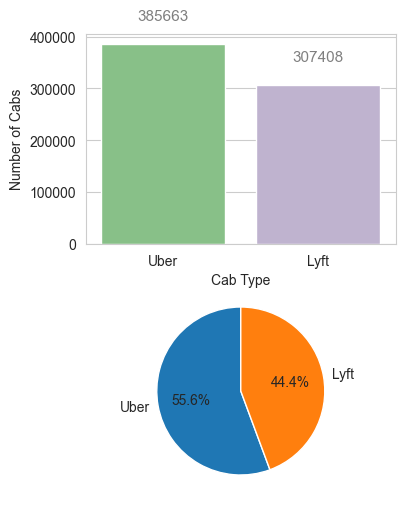

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
f, axes = plt.subplots(2, 1, figsize=(4, 6))
counts = cabdata['cab_type'].value_counts()
vis1 = sns.barplot(x=counts.index, y=counts.values, palette='Accent', ax=axes[0],color='red')
vis1.set(xlabel='Cab Type', ylabel='Number of Cabs')
for p in vis1.patches:
    vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                  textcoords='offset points')
Ncab_type = counts.values
cab_type = counts.index
plt.pie(Ncab_type, labels=cab_type, startangle=90, autopct='%.1f%%')
plt.show()

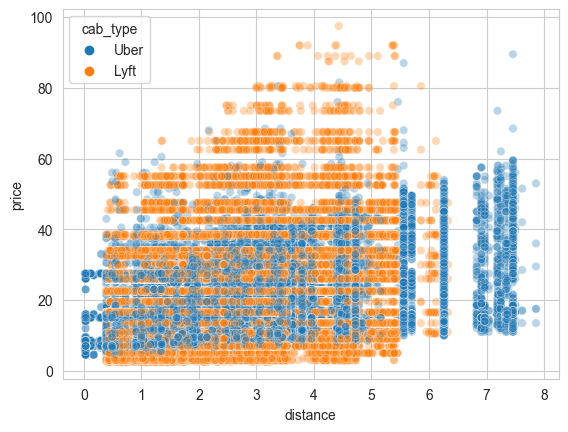

In [31]:
Taxi=cabdata[cabdata.name == 'Taxi'].index
cabdata.drop(Taxi , inplace=True)
vis1=sns.scatterplot(x=cabdata.distance,y=cabdata.price,data=cabdata, hue=cabdata.cab_type, hue_order=cab_type,alpha=0.3, legend='full')

Before showing a general price vs distance chart, drop 'Taxi' from Uber cabs as they use a different fare structure (in the dataset Taxi fare is always 0 USD) Based on the chart below, it can be observed that Lyft has a lower minimum fare compared to Uber, at the same time Lyft has higher maximum fare. Also, Uber travel distances are generally higher than Lyft.

We also know there is a 'surge multiplier' factor in Lyft, where the fare is multiplied by a certain rate during rush hours.

When prices surge , Uber does not show a multiplier and instead quotes only the higher price up front. Lyft marks up its Prime Time pricing with a percentage: If the rate is 50 percent, a fare that would normally be USD10 costs USD15. [source] This will be verified with the visualization below

C:\Users\MURALI\AppData\Local\Temp\ipykernel_9896\1468619933.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


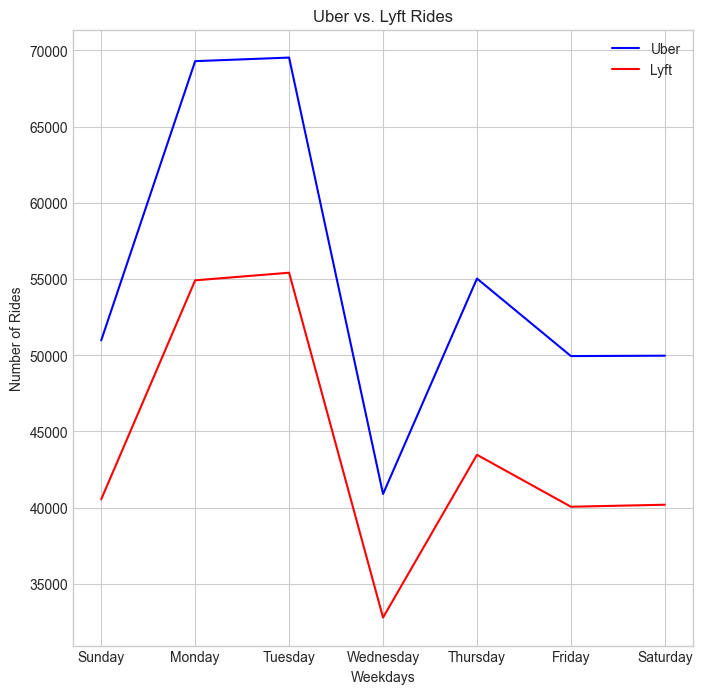

In [32]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

uber_day_count = df_final[df_final['cab_type'] == 'Uber']['Day'].value_counts()
uber_day_count = uber_day_count.reindex(index=[ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'])

lyft_day_count = df_final[df_final['cab_type'] == 'Lyft']['Day'].value_counts()
lyft_day_count = lyft_day_count.reindex(index=[ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'])
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(uber_day_count.index, uber_day_count, label='Uber',color='blue')
ax.plot(lyft_day_count.index, lyft_day_count, label='Lyft',color='red')
ax.set_ylabel('Number of Rides')
ax.set_xlabel('Weekdays')
ax.legend()
ax.set_title('Uber vs. Lyft Rides')
plt.show()

the above plot is between number of rides and  weekdays

The number of rides by weekdays, the ride distrubution in one day

C:\Users\MURALI\AppData\Local\Temp\ipykernel_9896\1786661356.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


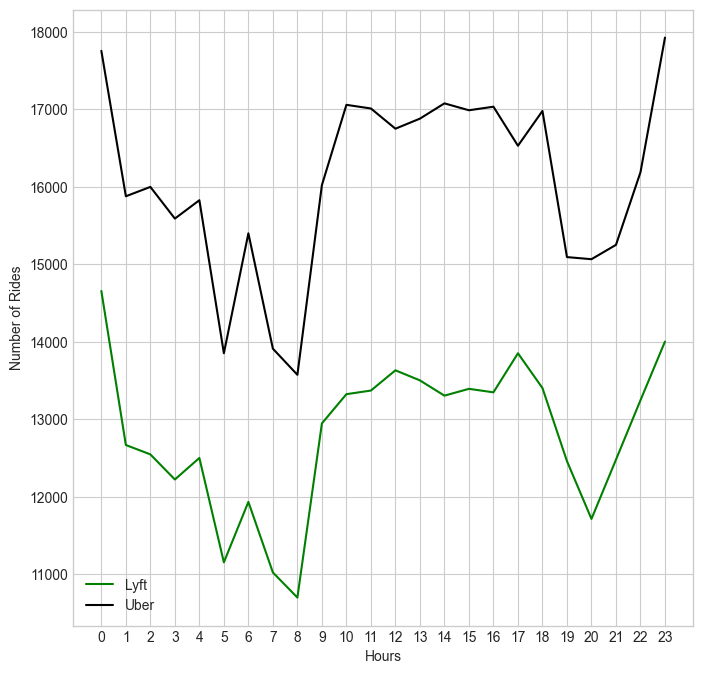

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use('seaborn-whitegrid')
lyft_data = df_final[df_final['cab_type'] == 'Lyft'].groupby('Hour').Hour.count()
ax.plot(lyft_data.index, lyft_data, label='Lyft',color='green')
uber_data = df_final[df_final['cab_type'] == 'Uber'].groupby('Hour').Hour.count()
ax.plot(uber_data.index, uber_data, label='Uber',color='black')
ax.legend()
ax.set(xlabel='Hours', ylabel='Number of Rides')
plt.xticks(range(0, 24, 1))
plt.show()


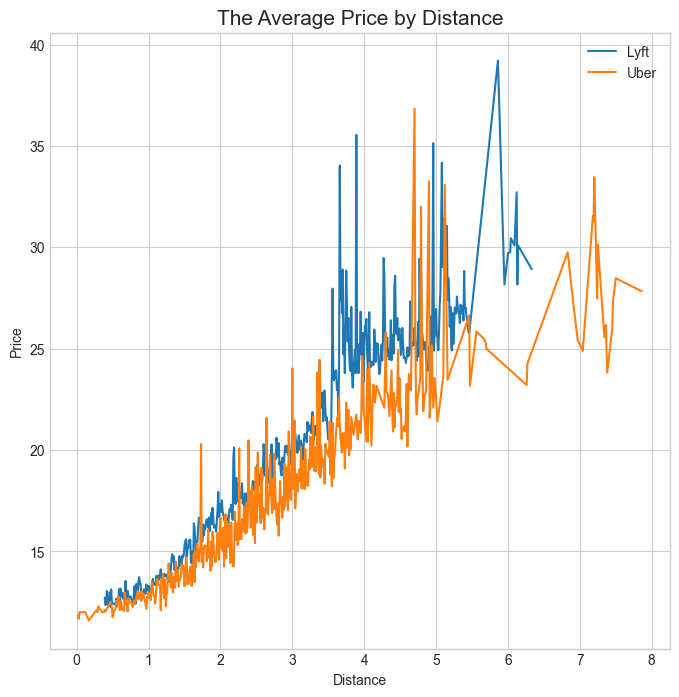

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
lyft_data = df_final[df_final['cab_type'] == 'Lyft'].groupby('distance').price.mean()
ax.plot(lyft_data.index, lyft_data, label='Lyft')
uber_data = df_final[df_final['cab_type'] == 'Uber'].groupby('distance').price.mean()
ax.plot(uber_data.index, uber_data, label='Uber')
ax.set_title('The Average Price by Distance', fontsize=15)
ax.set(xlabel='Distance', ylabel='Price')
ax.legend()
plt.show()



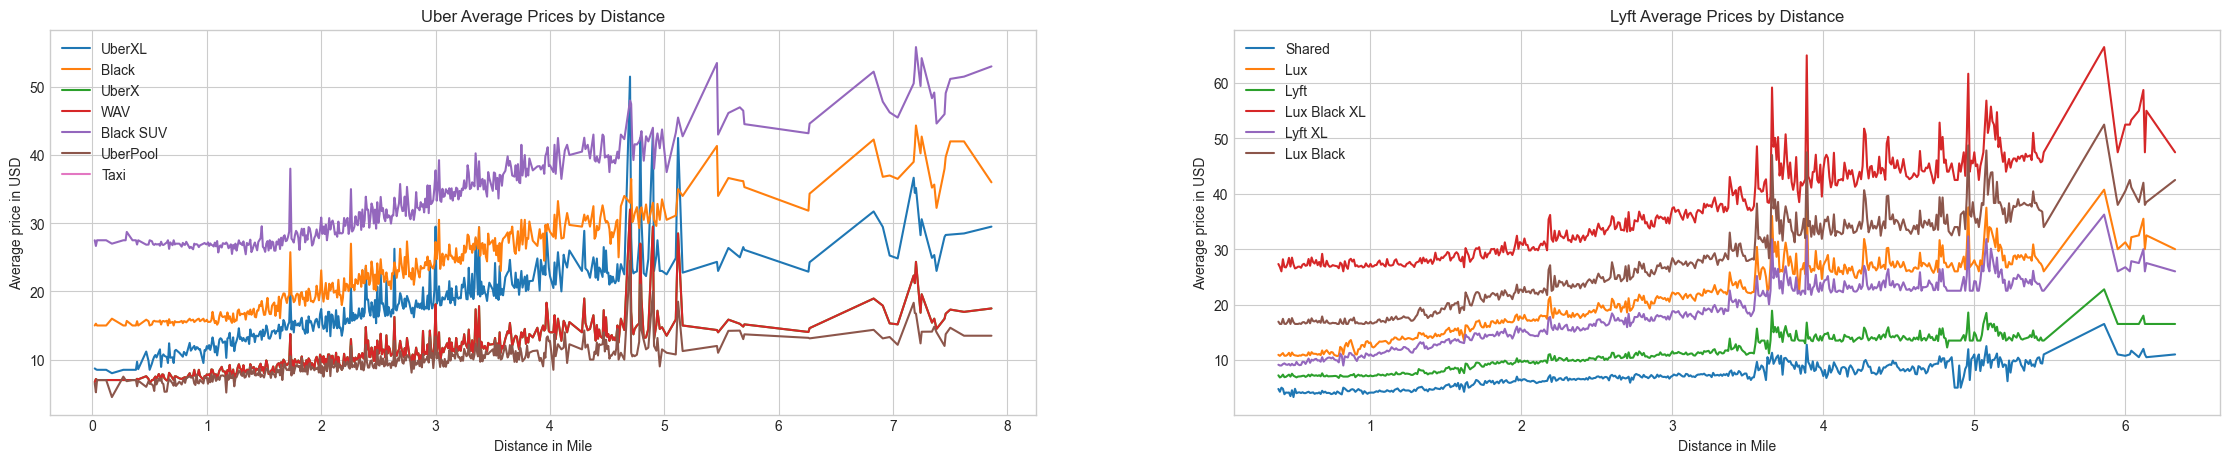

In [35]:

fig, ax = plt.subplots(1, 2, figsize=(28, 5))
for i, col in enumerate(df_final[df_final['cab_type'] == 'Uber']['name'].unique()):
    data = df_final[(df_final['name'] == col) & (df_final['cab_type'] == 'Uber')]
    ax[0].plot(data.groupby("distance").price.mean().index, data.groupby("distance").price.mean(), label=col)

ax[0].legend()
ax[0].set(xlabel='Distance in Mile', ylabel='Average price in USD')
ax[0].set_title("Uber Average Prices by Distance")

for i, col in enumerate(df_final[df_final['cab_type'] == 'Lyft']['name'].unique()):
    data = df_final[(df_final['name'] == col) & (df_final['cab_type'] == 'Lyft')]
    ax[1].plot(data.groupby("distance").price.mean().index, data.groupby("distance").price.mean(), label=col)

ax[1].legend()
ax[1].set(xlabel='Distance in Mile', ylabel='Average price in USD')
ax[1].set_title("Lyft Average Prices by Distance")

plt.show()


droping the column from the data frame ,merge the dataframes

In [36]:
cabdata = cabdata.drop('merged_date', axis=1)
cabdata = cabdata.drop('date', axis=1)
weatherdata = weatherdata.drop('merged_date', axis=1)
weatherdata = weatherdata.drop('date', axis=1)


In [37]:
columns ='source_temp,source,source_clouds,source_pressure,source_rain,source_humidity,source_wind'.split(',')
source_weather_df = weatherdata.drop('time_stamp',axis=1).copy()
for index,col in enumerate(columns):
    source_weather_df[col] = source_weather_df.iloc[:,index]
source_weather_df=source_weather_df.iloc[:,source_weather_df.shape[1]//2:]
source_weather_df

,source_temp,source,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,42.42,Back Bay,1.00,1012.14,0.1228,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,0.75,11.49
...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54


In [38]:
columns ='destination_temp,destination,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind'.split(',')
destination_weather_df = weatherdata.drop('time_stamp',axis=1).copy()
for index,col in enumerate(columns):
    destination_weather_df[col] = destination_weather_df.iloc[:,index]
destination_weather_df=destination_weather_df.iloc[:,destination_weather_df.shape[1]//2:]
destination_weather_df

,destination_temp,destination,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,42.42,Back Bay,1.00,1012.14,0.1228,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,0.75,11.49
...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54


In [39]:
source_weather_df

,source_temp,source,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,42.42,Back Bay,1.00,1012.14,0.1228,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,0.75,11.49
...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54


In [40]:
cabdata.nunique()

distance               549
cab_type                 2
time_stamp          113945
destination             12
source                  12
price                  147
surge_multiplier         7
id                  637976
product_id              12
name                    12
dtype: int64

In [41]:
source_weather_df.nunique()

source_temp        2031
source               12
source_clouds       100
source_pressure    1494
source_rain         437
source_humidity      55
source_wind        1331
dtype: int64

In [42]:
data=cabdata.merge(source_weather_df,right_index=True,left_index=True).merge(destination_weather_df,on='destination')


In [43]:
data

,distance,cab_type,time_stamp,destination,source_x,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,42.21,1.00,1012.16,0.2069,0.77,11.37
1,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,41.95,0.81,991.63,NaN,0.73,10.87
2,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,43.92,1.00,1006.29,0.0409,0.90,10.09
3,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,27.22,0.15,1033.40,NaN,0.81,3.01
4,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,45.47,1.00,1012.47,NaN,0.86,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029211,2.62,Uber,1543346124745,Boston University,Theatre District,8.0,1.0,eef71a96-b75b-4667-a648-14ddc96c97ba,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,1018.50,NaN,0.70,4.25,29.86,0.04,1016.54,NaN,0.84,3.13
3029212,2.62,Uber,1543346124745,Boston University,Theatre District,8.0,1.0,eef71a96-b75b-4667-a648-14ddc96c97ba,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,1018.50,NaN,0.70,4.25,32.74,0.88,1020.18,NaN,0.79,4.13
3029213,2.62,Uber,1543346124745,Boston University,Theatre District,8.0,1.0,eef71a96-b75b-4667-a648-14ddc96c97ba,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,1018.50,NaN,0.70,4.25,35.40,0.90,1003.51,NaN,0.91,7.14
3029214,2.62,Uber,1543346124745,Boston University,Theatre District,8.0,1.0,eef71a96-b75b-4667-a648-14ddc96c97ba,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,1018.50,NaN,0.70,4.25,39.43,1.00,1018.07,0.0269,0.92,5.30


In [44]:
data.shape

(3029216, 23)

In [45]:
data.dropna()

,distance,cab_type,time_stamp,destination,source_x,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,42.21,1.00,1012.16,0.2069,0.77,11.37
2,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,43.92,1.00,1006.29,0.0409,0.90,10.09
21,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,44.09,1.00,998.14,0.0097,0.90,14.41
26,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,44.07,0.99,1005.36,0.2178,0.90,11.35
47,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1012.14,0.1228,0.77,11.25,39.24,1.00,1019.54,0.0295,0.86,4.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026051,2.29,Lyft,1544714708808,Boston University,Beacon Hill,16.5,1.0,fdc788a6-b334-490d-8ba4-88cdb14b5a74,lyft_premier,Lux,...,997.93,0.0020,0.70,10.38,39.16,1.00,1019.50,0.0300,0.86,3.89
3026052,2.29,Lyft,1544714708808,Boston University,Beacon Hill,16.5,1.0,fdc788a6-b334-490d-8ba4-88cdb14b5a74,lyft_premier,Lux,...,997.93,0.0020,0.70,10.38,41.35,0.96,991.49,0.0030,0.63,9.47
3026057,2.29,Lyft,1544714708808,Boston University,Beacon Hill,16.5,1.0,fdc788a6-b334-490d-8ba4-88cdb14b5a74,lyft_premier,Lux,...,997.93,0.0020,0.70,10.38,42.40,0.87,1012.42,0.0994,0.77,10.94
3026066,2.29,Lyft,1544714708808,Boston University,Beacon Hill,16.5,1.0,fdc788a6-b334-490d-8ba4-88cdb14b5a74,lyft_premier,Lux,...,997.93,0.0020,0.70,10.38,41.08,1.00,988.91,0.0033,0.88,11.92


In [46]:
cat=data.dtypes [data.dtypes == 'object'].index.values
cat

array(['cab_type', 'destination', 'source_x', 'id', 'product_id', 'name',
       'source_y'], dtype=object)

In [47]:
for i in cat:
 print("Column:",i)
 print('count of classes',data[i].nunique())
 print(data[i])
 print('*'*50)

Column: cab_type
count of classes 2
0          Lyft
1          Lyft
2          Lyft
3          Lyft
4          Lyft
           ... 
3029211    Uber
3029212    Uber
3029213    Uber
3029214    Uber
3029215    Uber
Name: cab_type, Length: 3029216, dtype: object
**************************************************
Column: destination
count of classes 12
0              North Station
1              North Station
2              North Station
3              North Station
4              North Station
                 ...        
3029211    Boston University
3029212    Boston University
3029213    Boston University
3029214    Boston University
3029215    Boston University
Name: destination, Length: 3029216, dtype: object
**************************************************
Column: source_x
count of classes 12
0          Haymarket Square
1          Haymarket Square
2          Haymarket Square
3          Haymarket Square
4          Haymarket Square
                 ...       
3029211    Theatre Distri

In [48]:
data.dtypes [data.dtypes!= 'object'].index.values

array(['distance', 'time_stamp', 'price', 'surge_multiplier',
       'source_temp', 'source_clouds', 'source_pressure', 'source_rain',
       'source_humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_rain',
       'destination_humidity', 'destination_wind'], dtype=object)

In [49]:
data1=data.copy()
x='*'
from sklearn.preprocessing import LabelEncoder 
for i in cat: 
 print("LABEL ENCODED for column: ",i) 
 LE = LabelEncoder() 
 data[i]= LE.fit_transform(data[i]) 

LABEL ENCODED for column:  cab_type
LABEL ENCODED for column:  destination
LABEL ENCODED for column:  source_x
LABEL ENCODED for column:  id
LABEL ENCODED for column:  product_id
LABEL ENCODED for column:  name
LABEL ENCODED for column:  source_y


In [50]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source_x',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'source_temp',
       'source_y', 'source_clouds', 'source_pressure', 'source_rain',
       'source_humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_rain',
       'destination_humidity', 'destination_wind'],
      dtype='object')

In [51]:
data.isna().sum()

distance                      0
cab_type                      0
time_stamp                    0
destination                   0
source_x                      0
price                         0
surge_multiplier              0
id                            0
product_id                    0
name                          0
source_temp                   0
source_y                      0
source_clouds                 0
source_pressure               0
source_rain             2597218
source_humidity               0
source_wind                   0
destination_temp              0
destination_clouds            0
destination_pressure          0
destination_rain        2597707
destination_humidity          0
destination_wind              0
dtype: int64

In [52]:
x = data['name,cab_type,destination,source_x'.split(',')]
y = data['price']

In [53]:
x.isna().sum()

name           0
cab_type       0
destination    0
source_x       0
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1) 
print(x_train.shape)
print(x_test.shape)

(2423372, 4)
(605844, 4)


In [55]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=6,n_jobs=-1,max_depth=5)

In [56]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=6, n_jobs=-1)

In [57]:
pred = model.predict(x_test)
pred

array([18.83050503,  8.83081195, 14.13827663, ...,  8.94536609,
       15.27312238, 35.92266648])

In [58]:
from sklearn.metrics import r2_score

score = r2_score(y_test,pred)
score

0.8105811341414357

In [59]:
score*100

81.05811341414358

In [60]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [61]:
from sklearn.metrics import median_absolute_error,mean_squared_error
mean_squared_error(y_test,pred)**0.5

3.9709459318695246

In [62]:
model  = pickle.load(open(filename, 'rb'))